# IMPORTING THE DATA 

In [15]:
import pandas as pd
data = pd.read_csv("c:\cancer.csv")

data

,Age,Year,Auxillary nodes,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


# QUESTION 1(a)

In [3]:
data.describe()

,Age,Year,Auxillary nodes,Survival
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


ALL THE VARIABLES HAVE A DECENT IMPACTON THE OVERALL MODEL. COMPARING THE MEAN VALUES , "YEAR" HAS THE BIGGEST IMPACT ON THE 
OVERALL PREDICTION AND "SURVIVAL" HAS A VERY LITTLE IMPACT.

# QUESTION 1(b)

In [4]:
corr = data.corr()

corr

,Age,Year,Auxillary nodes,Survival
Age,1.000000,0.092623,-0.066548,0.064351
Year,0.092623,1.000000,-0.003277,-0.004076
Auxillary nodes,-0.066548,-0.003277,1.000000,0.286191
Survival,0.064351,-0.004076,0.286191,1.000000


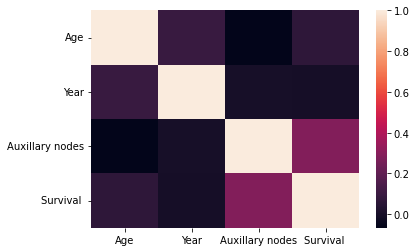

In [5]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr)

plt.show()

AGE IS POSITIVELY CORRELATED WITH THE OTHER VARIABLES LIKE "YEAR" & "SURVIVAL" AND NEGATIVELY CORRELATED WITH "AUXILLARY NODES"
YEAR IS POSITIVELY CORRELATED WITH THE OTHER VARIABLES LIKE "AGE" AND NEGATIVELY CORRELATED WITH "AUXILLARY NODES" & "SURVIVAL"
AUXIALLARY NODES IS POSITIVELY CORRELATED WITH  "SURVIVAL" AND NEGATIVELY CORRELATED WITH "YEAR" & "AGE"
SURVIVAL IS POSITIVELY CORRELATED WITH THE OTHER VARIABLES LIKE "AUXILLARY NODE" & "AGE" AND NEGATIVELY CORRELATED WITH "YEAR" 




# QUESTION 1(c)

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Auxillary nodes'}>,
        <AxesSubplot:title={'center':'Survival '}>]], dtype=object)

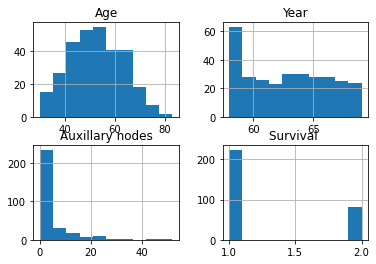

In [6]:
data.hist()

AGE  : CENTERED 
YEAR : SKEWED TO THE LEFT
AUXILLARY NODES : SKEWED TO THE LEFT
SURVIVAL :

# QUESTION 2 (a)

In [13]:

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay

In [20]:
data = pd.read_csv("c:\cancer.csv")

# Create features/inputs
X = data.drop(columns = ["Survival "])

# Create the output/class
y = data["Survival "]

# Splitting into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, train_size = 0.6)

data

,Age,Year,Auxillary nodes,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


              precision    recall  f1-score   support

           1       0.82      0.94      0.88        97
           2       0.45      0.20      0.28        25

    accuracy                           0.79       122
   macro avg       0.64      0.57      0.58       122
weighted avg       0.74      0.79      0.75       122



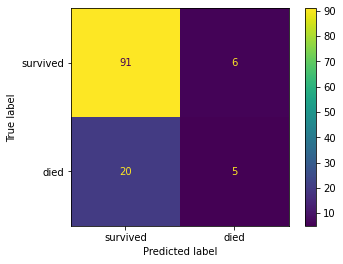

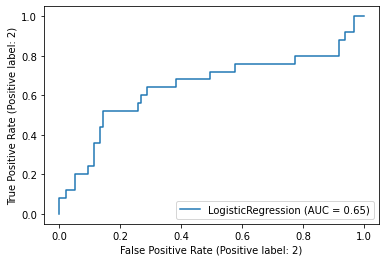

In [21]:
clf = LogisticRegression(solver = "lbfgs", penalty = "l2", C = 0.01, random_state = 10).fit(X_train, y_train)
clf.score(X_test, y_test)
y_pred = clf.predict(X_test)
labels = ["survived", "died"]
cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot()
print(classification_report(y_test, y_pred, labels = clf.classes_))
plot_roc_curve(clf, X_test, y_test) 
plt.show()

INTERPRETATION FOR MODEL 1 :
THE ACCURACY OF THE MODEL IS 64%
FALSE POSITIVE : THE MODEL PREDICTED 6 PATIENTS WHO SURVIVED AFTER DIAGNOSIS TO BE DEAD
FALSE NEGATIVE : THE MODEL PREDICTED 20 PATIENTS WHO ARE DEAD TO BE SURVIVED, WHICH IS MORE DANGEROUS THAN THE FALSE POSITIVE
                 OCCURANCE.

# QUESTION 2(b)

              precision    recall  f1-score   support

           1       0.83      0.91      0.87        97
           2       0.44      0.28      0.34        25

    accuracy                           0.78       122
   macro avg       0.63      0.59      0.60       122
weighted avg       0.75      0.78      0.76       122



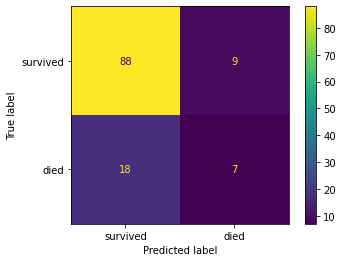

In [33]:
rf = RandomForestClassifier(n_estimators = 10, max_depth = 5, max_features = 'sqrt', random_state = 0).fit(X_train, y_train)
rf_pred = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, rf_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_rf, display_labels = labels)
disp.plot()
print(classification_report(y_test, rf_pred, labels = clf.classes_))

INTERPRETATION FOR MODEL 2 : THE ACCURACY OF THE MODEL IS 63% FALSE POSITIVE : THE MODEL PREDICTED 9 PATIENTS WHO SURVIVED AFTER DIAGNOSIS TO BE DEAD FALSE NEGATIVE : THE MODEL PREDICTED 18 PATIENTS WHO ARE DEAD TO BE SURVIVED, WHICH IS MORE DANGEROUS THAN THE FALSE POSITIVE OCCURANCE.

# QUESTION 2(c)

              precision    recall  f1-score   support

           1       0.82      0.90      0.86        97
           2       0.38      0.24      0.29        25

    accuracy                           0.76       122
   macro avg       0.60      0.57      0.57       122
weighted avg       0.73      0.76      0.74       122



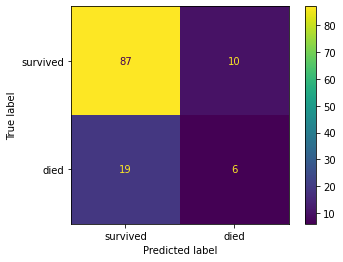

In [30]:
svm = SVC(random_state = 0, kernel = "rbf", gamma = 1).fit(X_train, y_train)
svm_pred = svm.predict(X_test)
cm_svm = confusion_matrix(y_test, svm_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_svm, display_labels = labels)
disp.plot()
print(classification_report(y_test, svm_pred, labels = clf.classes_))

INTERPRETATION FOR MODEL 3 : THE ACCURACY OF THE MODEL IS 60% FALSE POSITIVE : THE MODEL PREDICTED 10 PATIENTS WHO SURVIVED AFTER DIAGNOSIS TO BE DEAD FALSE NEGATIVE : THE MODEL PREDICTED 19 PATIENTS WHO ARE DEAD TO BE SURVIVED, WHICH IS MORE DANGEROUS THAN THE FALSE POSITIVE OCCURANCE.

# QUESTION 2(d)

              precision    recall  f1-score   support

           1       0.82      0.87      0.84        97
           2       0.35      0.28      0.31        25

    accuracy                           0.75       122
   macro avg       0.59      0.57      0.58       122
weighted avg       0.73      0.75      0.73       122



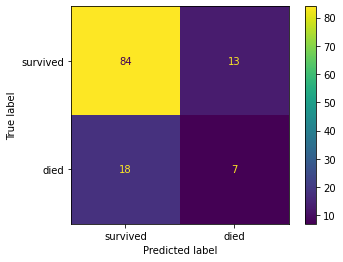

In [24]:
nn = MLPClassifier(solver = 'lbfgs', alpha = 0.0001, hidden_layer_sizes = (15,), random_state = 1, activation = "relu", learning_rate_init = 0.01).fit(X_train, y_train)

nn_pred = nn.predict(X_test)

cm_nn = confusion_matrix(y_test, nn_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_nn, display_labels = labels)
disp.plot()
print(classification_report(y_test, nn_pred, labels = clf.classes_))

INTERPRETATION FOR MODEL 4 : THE ACCURACY OF THE MODEL IS 59% FALSE POSITIVE : THE MODEL PREDICTED 13 PATIENTS WHO SURVIVED AFTER DIAGNOSIS TO BE DEAD FALSE NEGATIVE : THE MODEL PREDICTED 18 PATIENTS WHO ARE DEAD TO BE SURVIVED, WHICH IS MORE DANGEROUS THAN THE FALSE POSITIVE OCCURANCE.

In [25]:
# Use 10 - fold cross validation
kf = KFold(n_splits=10)

iteration = 1
for train_indices, test_indices in kf.split(X_train):
    clf.fit(X_train.iloc[train_indices], y_train.iloc[train_indices])
    print("Accuracy for iteration "+ str(iteration) + " is " + str(clf.score(X_train.iloc[test_indices], y_train.iloc[test_indices])))
    iteration += 1

Accuracy for iteration 1 is 0.6842105263157895
Accuracy for iteration 2 is 0.7894736842105263
Accuracy for iteration 3 is 0.631578947368421
Accuracy for iteration 4 is 0.7222222222222222
Accuracy for iteration 5 is 0.6666666666666666
Accuracy for iteration 6 is 0.8333333333333334
Accuracy for iteration 7 is 0.8333333333333334
Accuracy for iteration 8 is 0.7777777777777778
Accuracy for iteration 9 is 0.6666666666666666
Accuracy for iteration 10 is 0.6666666666666666


In [26]:
# Use GridSearchCV for searching through hyper parameters
parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[1, 10]}

svm_grid = GridSearchCV(svm, parameters)
svm_grid.fit(X_train, y_train)
svm_grid.best_params_

{'C': 1, 'kernel': 'linear'}

OUT OF THE FOUR MODELS THE BEST MODEL IS " RANDOMFOREST", THE FALSE POSITIVE AND THE FALSE NEGATIVE SHULD BE LOW FOR THE MODEL
TO BE A BEST FIT. IN THIS CASE THE FALSE NEGATIVE IS MORE DANGEROUS THAN THE FALSE POSITIVE. THE PATIENTS WHO ARE DEAD ARE 
PREDICTED TO BE SURVIVED BY THE MODELS INACCURATELY WHICH IS DANGEROUS. THEREFORE , CONSIDERING THE VALUE OF FALSE NEGATIVES
IN ALL THE 4 MODELS , THE MODEL 2 & 4 HAS THE LEAST NO OF FALSE NEGATIVES. COMPARING THE ACCURACIES OF BOTH MODEL WE CAN 
CONCLUDE THAT THE MODEL 2 IS THE  BEST FIT.

THEREFORE , RANDOM FORESTCLASSIFICATION IS THE BEST FIT MODEL


# QUESTION NO 3

In [31]:
# Use 10 - fold cross validation
kf = KFold(n_splits=10)

iteration = 1
for train_indices, test_indices in kf.split(X_train):
    clf.fit(X_train.iloc[train_indices], y_train.iloc[train_indices])
    print("Accuracy for iteration "+ str(iteration) + " is " + str(clf.score(X_train.iloc[test_indices], y_train.iloc[test_indices])))
    iteration += 1

Accuracy for iteration 1 is 0.6842105263157895
Accuracy for iteration 2 is 0.7894736842105263
Accuracy for iteration 3 is 0.631578947368421
Accuracy for iteration 4 is 0.7222222222222222
Accuracy for iteration 5 is 0.6666666666666666
Accuracy for iteration 6 is 0.8333333333333334
Accuracy for iteration 7 is 0.8333333333333334
Accuracy for iteration 8 is 0.7777777777777778
Accuracy for iteration 9 is 0.6666666666666666
Accuracy for iteration 10 is 0.6666666666666666


 THE AVERAGE  ACCURACY OF THE 10 ITERATIONS = 0.980502,
 THE AVERAGE ACCURACY FOR MODEL 1 = 0.64,
 THE AVERAGE ACCURACY FOR MODEL 2 = 0.63,
 THE AVERAGE ACCURACY FOR MODEL 3 = 0.60,
 THE AVERAGE ACCURACY FOR MODEL 4 = 0.5.
    
SINCE THE MODEL IS PERFORMING EXTREMELY WELL IN THE VALIDATION SET AND PERFORMING POOR IN THE ACTUAL TESTING SET, THE MODELS ARE 
OVER FITTING FOR THE TRAINING DATA.
 


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import Clustering algorithms
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.mixture import GaussianMixture
from sklearn.cluster import Birch

# Evaluate accuracy
from sklearn.metrics import accuracy_score

In [35]:
# Selecting features for clustering

X = data[data.columns[0:2]]

y = data["Survival "]

<AxesSubplot:xlabel='Age', ylabel='Year'>

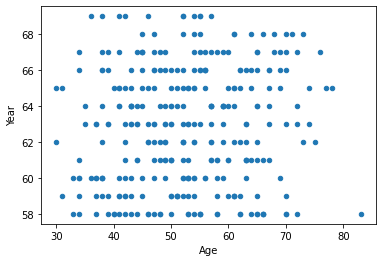

In [42]:
X.plot.scatter(x = "Age", y = "Year")